In [14]:
import pandas as pd
import numpy as np

from tqdm import tqdm

from news_vec.corpus import Corpus

from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [5]:
corpus = Corpus('../data/clf-headlines.json/')

2018-12-27 14:56:23,292 | INFO : Reading headlines.
1225511it [00:15, 77322.34it/s] 


In [6]:
df = corpus.sample_ab('breitbart.com', 'rt.com')

In [33]:
ds = corpus.sample_a_vs_b('breitbart.com', 'rt.com')

In [34]:
df = ds.to_df()

In [12]:
def a_vs_b(a, b, n=10, verbose=True):
    
    df = corpus.sample_ab(a, b)
    
    tv = TfidfVectorizer(
        analyzer='word',
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        token_pattern=None,
        ngram_range=(1,3)
    )
    
    clf = LinearSVC()
    
    X = tv.fit_transform(df.clf_tokens)
    
    return cross_val_score(clf, X, df.domain, cv=n, n_jobs=-1, verbose=verbose)

In [13]:
a_vs_b('breitbart.com', 'rt.com', 100)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.0s finished


array([0.82342007, 0.77881041, 0.79925651, 0.81226766, 0.82527881,
       0.81412639, 0.81040892, 0.85130112, 0.81226766, 0.82342007,
       0.83828996, 0.83457249, 0.82899628, 0.82899628, 0.78810409,
       0.81040892, 0.78996283, 0.866171  , 0.81598513, 0.80669145,
       0.84200743, 0.83271375, 0.84572491, 0.85130112, 0.84758364,
       0.82156134, 0.84758364, 0.83457249, 0.82713755, 0.85873606,
       0.81226766, 0.84758364, 0.82527881, 0.84572491, 0.82527881,
       0.83085502, 0.86431227, 0.82713755, 0.79182156, 0.80669145,
       0.83271375, 0.87546468, 0.86802974, 0.84572491, 0.83085502,
       0.84200743, 0.83828996, 0.85501859, 0.84200743, 0.866171  ,
       0.84200743, 0.85130112, 0.83271375, 0.84386617, 0.866171  ,
       0.87546468, 0.86245353, 0.8605948 , 0.83085502, 0.84572491,
       0.86753731, 0.83955224, 0.84141791, 0.8358209 , 0.85074627,
       0.82089552, 0.84514925, 0.85820896, 0.85634328, 0.84328358,
       0.84701493, 0.81716418, 0.81529851, 0.86940299, 0.82649

In [15]:
domains = corpus.df.domain.unique()

In [16]:
pairs = list(combinations(domains, 2))

In [18]:
rows = []
for a, b in tqdm(pairs):
    scores = a_vs_b(a, b, verbose=False)
    for s in scores:
        rows.append((a, b, s))

100%|██████████| 120/120 [21:12<00:00, 10.47s/it]


In [19]:
score_df = pd.DataFrame(rows, columns=('d1', 'd2', 'acc'))

In [20]:
score_df['pair'] = score_df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [21]:
score_df.head(10)

,d1,d2,acc,pair
0,bloomberg.com,wsj.com,0.724125,bloomberg.com - wsj.com
1,bloomberg.com,wsj.com,0.721147,bloomberg.com - wsj.com
2,bloomberg.com,wsj.com,0.712025,bloomberg.com - wsj.com
3,bloomberg.com,wsj.com,0.711653,bloomberg.com - wsj.com
4,bloomberg.com,wsj.com,0.716307,bloomberg.com - wsj.com
5,bloomberg.com,wsj.com,0.713701,bloomberg.com - wsj.com
6,bloomberg.com,wsj.com,0.711839,bloomberg.com - wsj.com
7,bloomberg.com,wsj.com,0.713328,bloomberg.com - wsj.com
8,bloomberg.com,wsj.com,0.706255,bloomberg.com - wsj.com
9,bloomberg.com,wsj.com,0.705138,bloomberg.com - wsj.com


In [22]:
order = score_df.groupby('pair').mean().acc.sort_values(ascending=False).index

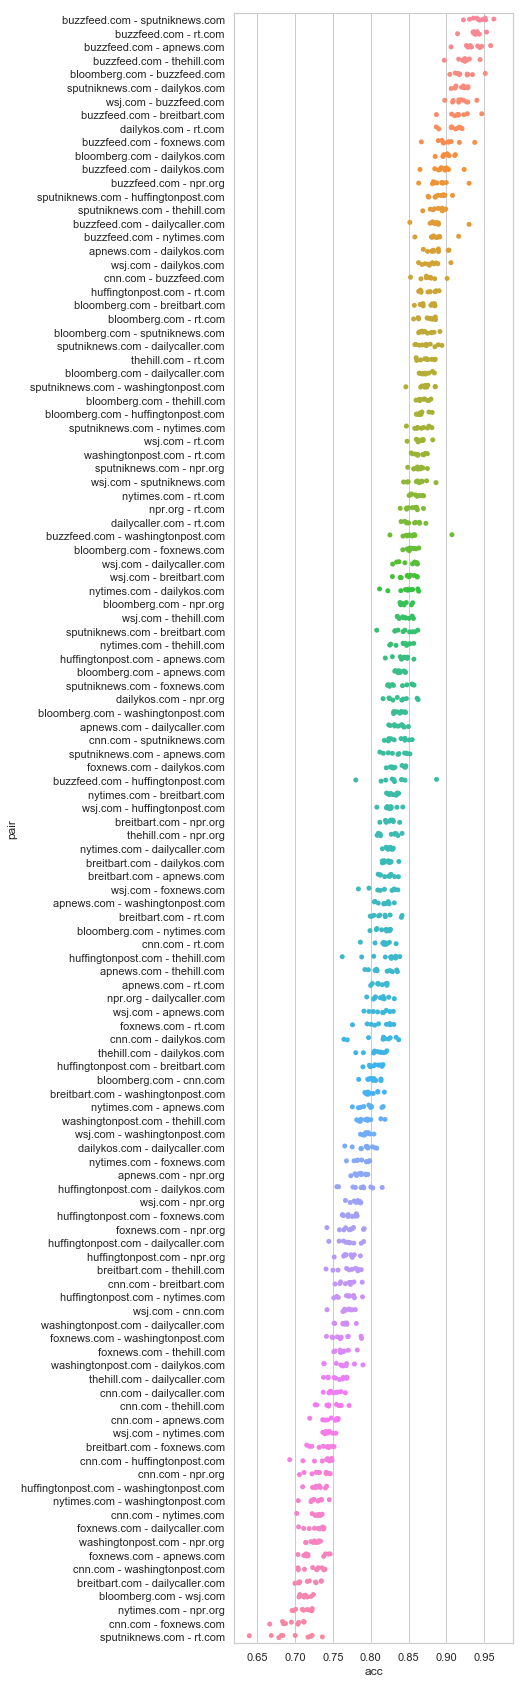

In [23]:
plt.figure(figsize=(5,30))
sns.stripplot(x='acc', y='pair', data=score_df, order=order)